<a href="https://colab.research.google.com/github/kjyotishman48/CNN_Medical_imaging_Pneumonia/blob/colab_train_cnn_copy/Train_CNN_Pneumonia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
from keras.models import Sequential
from keras.layers import Conv2D, Activation, MaxPooling2D, Dense, Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [21]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [22]:
def Build_CNN_Model():
    
    # -------------------------------------------------------------------------
    #                        Build CNN Model 
    # -------------------------------------------------------------------------
    model = Sequential()  
    
    #  First Block of CNN
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=(224, 224, 3)))  
    model.add(Activation('relu'))
    model.add(MaxPooling2D((2, 2)))   
    
    #  Second Block of CNN
    model.add(Conv2D(64, (3, 3),  padding='same'))  
    model.add(Activation('relu'))
    model.add(MaxPooling2D((2, 2)))
    
    #  Third Block of CNN
    model.add(Conv2D(128, (3, 3), padding='same'))  
    model.add(Activation('relu'))
    model.add(MaxPooling2D((2, 2)))      
    
    #  Flatten and Fully Connected Layer
    model.add(Flatten())
    model.add(Dense(1000))
    model.add(Activation('relu'))     
    
    #  Softmax Classifier
    model.add(Dense(2))
    model.add(Activation('softmax'))        
    
    #  Display model
    model.summary()    
	
    # compile model
    opt = SGD(learning_rate=0.001)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [23]:
def Train_CNN_Model(model):
    
    # -------------------------------------------------------------------------
    #                        Train CNN Model 
    # -------------------------------------------------------------------------
    
    # create data generators    
    train_datagen = ImageDataGenerator(
                                     rescale=1.0/255.0,
                                     featurewise_center= True,
                                     featurewise_std_normalization = True)
    
    valid_datagen = ImageDataGenerator(
                                     rescale=1.0/255.0,
                                     featurewise_center= True,
                                     featurewise_std_normalization = True)
    
   
    # prepare iterators
    batch_size=32
    train_it = train_datagen.flow_from_directory('/content/gdrive/MyDrive/dataset/Data/train',classes =('abnormal','normal'),batch_size=batch_size, target_size=(224, 224))
    valid_it = valid_datagen.flow_from_directory('/content/gdrive/MyDrive/dataset/Data/val',classes =('abnormal','normal'),batch_size=batch_size, target_size=(224, 224))


    epochs=100;
    
    history = model.fit_generator(train_it, steps_per_epoch=len(train_it),
		validation_data=valid_it, validation_steps=len(valid_it), epochs=epochs, verbose=1)
    
    
    #  "Accuracy"
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    
    # "Loss"
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()


In [24]:
def SAVE_CNN_Model(model):
# save model
    model.save('medical_diagnosis_cnn_model.h5')

In [25]:
# main entry 
model = Build_CNN_Model()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 activation_15 (Activation)  (None, 224, 224, 32)      0         
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 112, 112, 64)      18496     
                                                                 
 activation_16 (Activation)  (None, 112, 112, 64)      0         
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 56, 56, 64)       0         
 g2D)                                                 

Found 600 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
/usr/local/lib/python3.7/dist-packages/keras/preprocessing/image.py:1663: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras/preprocessing/image.py:1671: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/100
19/19 [==============================] - 372s 20s/step - loss: 0.6891 - accuracy: 0.5750 - val_loss: 0.6822 - val_accuracy: 0.5125
Epoch 2/100
19/19 [==============================] - 74s 4s/step - loss: 0.6805 - accuracy: 0.5417 - val_loss: 0.6753 - val_accuracy: 0.7500
Epoch 3/100
19/19 [==============================] - 72s 4s/step - loss: 0.6731 - accuracy: 0.7183 - val_loss: 0.6691 - val_accuracy: 0.6475
Epoch 4/100
19/19 [==============================] - 73s 4s/step - loss: 0.6662 - accuracy: 0.6983 - val_loss: 0.6632 - val_accuracy: 0.6950
Epoch 5/100
19/19 [==============================] - 73s 4s/step - loss: 0.6600 - accuracy: 0.6800 - val_loss: 0.6577 - val_accuracy: 0.8425
Epoch 6/100
19/19 [==============================] - 72s 4s/step - loss: 0.6526 - accuracy: 0.7567 - val_loss: 0.6521 - val_accuracy: 0.8500
Epoch 7/100
19/19 [==============================] - 72s 4s/step - loss: 0.6464 - accuracy: 0.8050 - val_loss: 0.6463 - val_accuracy: 0.8250
Epoch 8/100

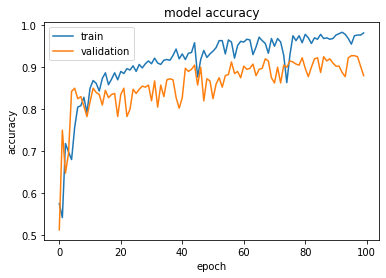

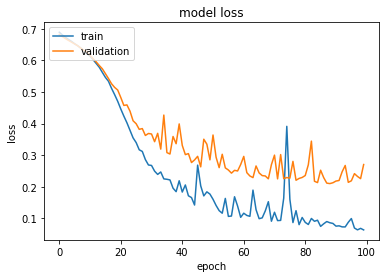

In [26]:
Train_CNN_Model(model)

In [27]:
SAVE_CNN_Model(model)